<a href="https://colab.research.google.com/github/romilp3058/LeadScoring/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Number of unique values in Ministry: 77, percentage wise: 0.012511089374673006
Number of unique values in Position: 2571, percentage wise: 0.41774039976992594
Number of unique values in Name: 5411, percentage wise: 0.8791883715111122
Number of unique values in Category: 5, percentage wise: 0.0008124084009527925
Number of unique values in Type: 56, percentage wise: 0.009098974090671277
Number of unique values in DateIncurred: 4298, percentage wise: 0.6983462614590206
Number of unique values in Amount: 38494, percentage wise: 6.254569797255359
Number of unique values in Description: 292193, percentage wise: 47.47600957991986
Unmatched Categories: ['Hospitality' 'Employee Travel-Other Costs' 'Daily Car Allowance']
                                                     Type Category_Original
0                                                   Meals             Meals
1                                                 Mileage    Transportation
2                                             Other

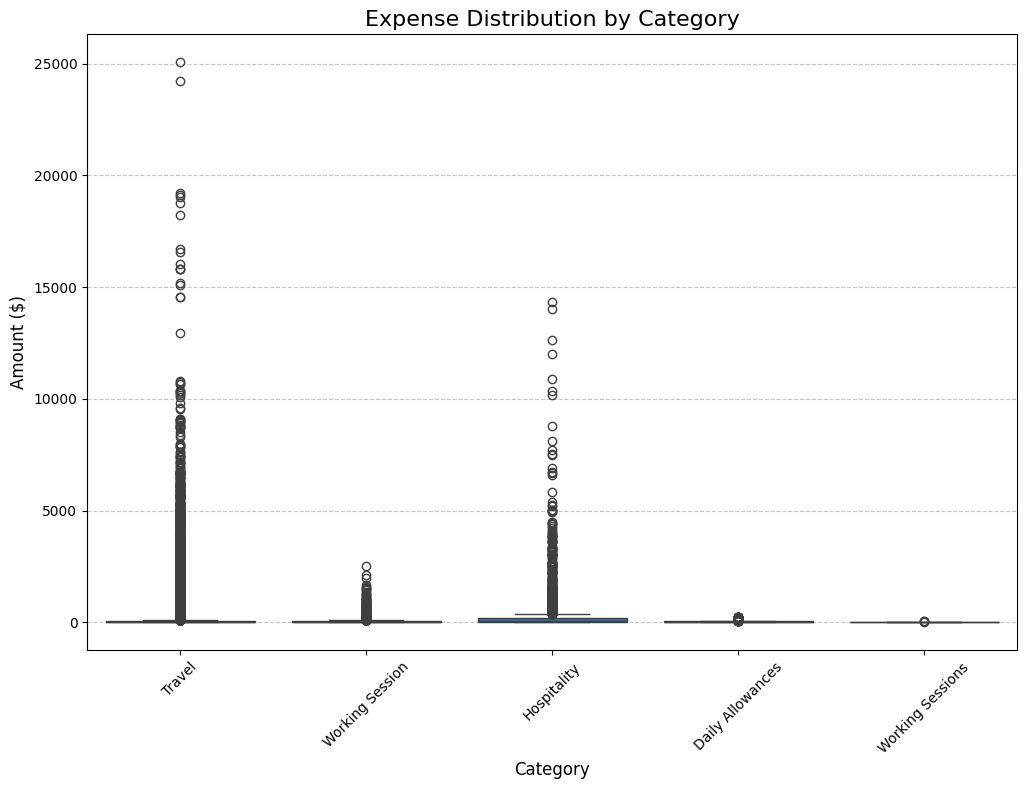

<ipython-input-17-6416a43e84d6>:167: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DateIncurred'] = pd.to_datetime(df['DateIncurred'])


Total NaN values in 'Amount_Adjusted': 0
        date  CPI_Total  V41690914  STATIC_TOTALCPICHANGE  CPI_TRIM  \
0 1995-01-01       86.6       86.6                    0.6       1.8   
1 1995-01-02       86.6       86.6                    0.6       1.8   
2 1995-01-03       86.6       86.6                    0.6       1.8   
3 1995-01-04       86.6       86.6                    0.6       1.8   
4 1995-01-05       86.6       86.6                    0.6       1.8   
5 1995-01-06       86.6       86.6                    0.6       1.8   
6 1995-01-07       86.6       86.6                    0.6       1.8   
7 1995-01-08       86.6       86.6                    0.6       1.8   
8 1995-01-09       86.6       86.6                    0.6       1.8   
9 1995-01-10       86.6       86.6                    0.6       1.8   

   CPI_MEDIAN  CPI_COMMON  ATOM_V41693242  STATIC_CPIXFET  CPIW  
0         1.7         1.1             NaN             2.2   1.7  
1         1.7         1.1             NaN    

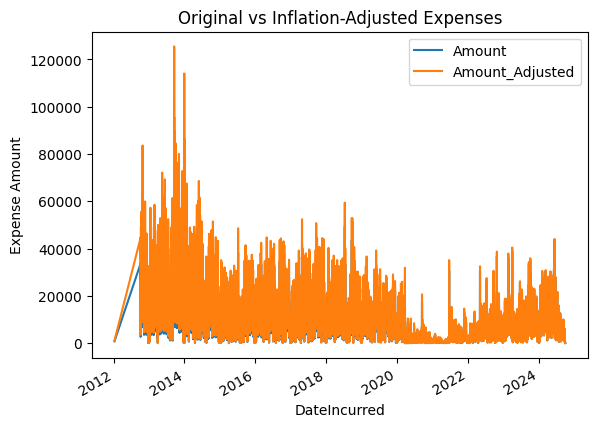

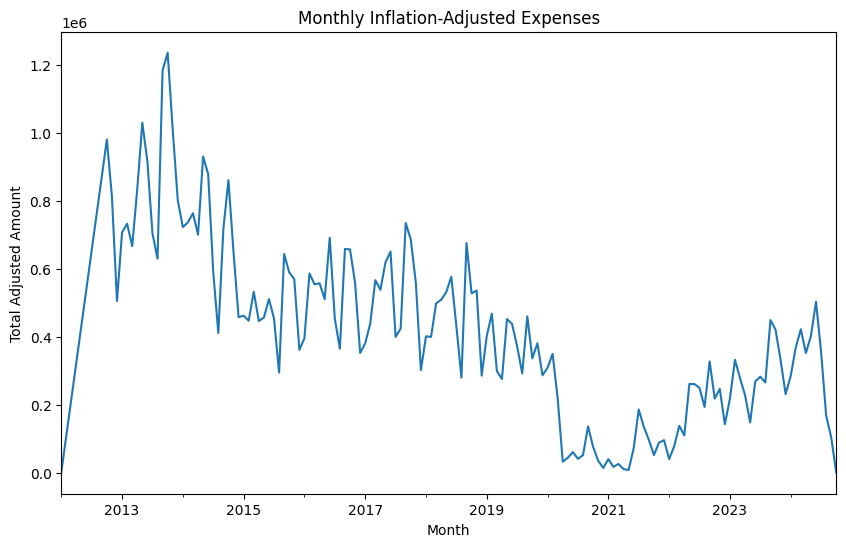

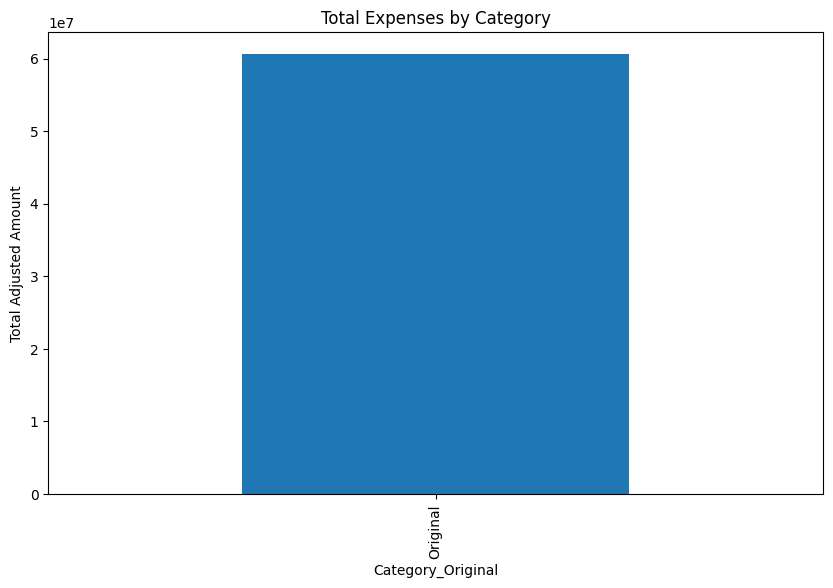

Target Shape: (615454,)
Target Sample:
0     21.080812
1    215.261249
2     33.245111
3     33.245111
4     21.080812
Name: Monthly_Avg_Adjusted, dtype: float64
Features Shape: (615454, 85)
Sample Features:
   Year  DayOfWeek  Position_Category_Governance  Position_Category_Other  \
0  2012          2                         False                    False   
1  2012          2                         False                    False   
2  2012          4                         False                    False   
3  2012          3                         False                    False   
4  2012          4                         False                    False   

   Position_Category_Regular Staff  Position_Category_Senior Staff  \
0                            False                           False   
1                            False                           False   
2                            False                           False   
3                            False               

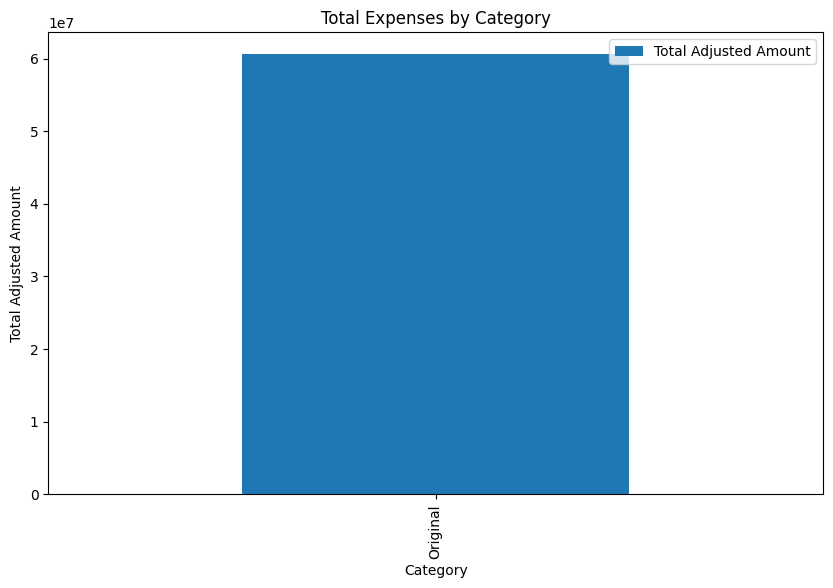

   Category  Total Adjusted Amount
0  Original           6.060926e+07


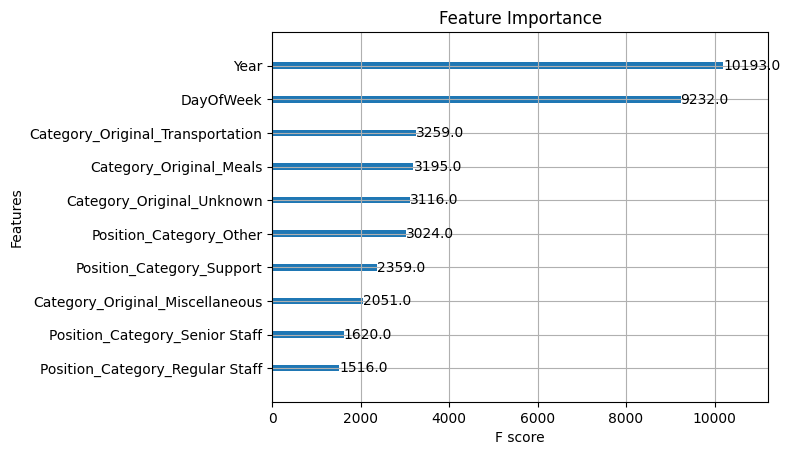

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:43:27] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb






#import files

df = pd.read_csv('/content/project/goa_expenses.csv')

#Importing CPI data
cpi_df = pd.read_csv('/content/project/CPI_MONTHLY.csv')


category_mapping = {
    # Accommodation
    "Accom  - Lodging Establishment": "Accommodation",
    "Accom - Lodging Establishment": "Accommodation",
    "Accom - Private Allowance": "Accommodation",
    "Accommodations": "Accommodation",
    "Boards, Committees And Agencies - Accom Allow": "Accommodation",
    "Employee Travel-Lodging": "Accommodation",

    # Transportation
    "Air - In Province": "Transportation",
    "Air - Out Of Country": "Transportation",
    "Air - Out Of Province": "Transportation",
    "Air Fare": "Transportation",
    "Bus": "Transportation",
    "Employee Travel-Airfare in Province": "Transportation",
    "Employee Travel-Airfare Out of Canada": "Transportation",
    "Employee Travel-Mileage": "Transportation",
    "Employee Travel-Transportation Costs": "Transportation",
    "Employee Travel-Vehicle Rental": "Transportation",
    "EmployeeTravel-Airfare Out of Province": "Transportation",
    "Fuel For Rental Vehicles": "Transportation",
    "Ground Transportation": "Transportation",
    "Mileage": "Transportation",
    "Mileage Allowance": "Transportation",
    "Parking": "Transportation",
    "Rail": "Transportation",
    "Taxi": "Transportation",
    "Vehicle Rental": "Transportation",

    # Meals
    "Breakfast": "Meals",
    "Breakfast - Out of Country": "Meals",
    "Boards, Committees And Agencies - Breakfast": "Meals",
    "Boards, Committees And Agencies - Dinner": "Meals",
    "Boards, Committees And Agencies - Lunch": "Meals",
    "Dinner": "Meals",
    "Dinner - Out of Country": "Meals",
    "Employee Travel-Meals": "Meals",
    "Lunch": "Meals",
    "Lunch - Out of Country": "Meals",
    "Meal Allowance": "Meals",
    "Meals": "Meals",

    # Miscellaneous
    "Adverse Condition Allowance": "Miscellaneous",
    "Boards, Committees And Agencies - Mileage": "Miscellaneous",
    "Boards, Committees And Agencies - Other": "Miscellaneous",
    "Boards, Committees And Agencies - Per Diem": "Miscellaneous",
    "Business Insurance": "Miscellaneous",
    "Honoraria Travel Expenses": "Miscellaneous",
    "Honorarium": "Miscellaneous",
    "Laundry Services": "Miscellaneous",
    "Medical Insurance": "Miscellaneous",
    "Other Costs": "Miscellaneous",
    "Passports": "Miscellaneous",
    "Per Diem - In Country": "Miscellaneous",
    "Per Diem - Out Of Country": "Miscellaneous",
    "Travel Expenses - Boards, Committees And Agencies": "Miscellaneous",
    "Vehicle Business Insurance": "Miscellaneous",
    "Working Session": "Miscellaneous",


}

def classify_position(position):
    position = position.lower()
    if any(keyword in position for keyword in ["chair", "board member", "trustee", "governor"]):
        return "Governance"
    elif any(keyword in position for keyword in ["ceo", "deputy minister", "assistant deputy minister", "associate deputy minister",
                                                 "executive director", "president", "commissioner", "chief", "chief executive",
                                                 "director general"]):
        return "Executive"
    elif any(keyword in position for keyword in ["manager", "head", "leader", "senior advisor", "advisor", "supervisor",
                                                 "consultant", "branch head", "regional director", "strategic lead"]):
        return "Senior Staff"
    elif any(keyword in position for keyword in ["analyst", "coordinator", "specialist", "officer", "planner", "developer",
                                                 "inspector", "facilitator", "technologist", "representative", "liaison"]):
        return "Regular Staff"
    elif any(keyword in position for keyword in ["assistant", "clerk", "technician", "support", "secretary", "receptionist",
                                                 "aide", "operator", "associate"]):
        return "Support"
    else:
        return "Other"

df.dtypes

for c in df.columns:
    print('Number of unique values in ' + c + ': ' + str(df[c].nunique()) + ', percentage wise: ' + str((df[c].nunique() / df.shape[0]) * 100))
    if df.dtypes[c] == 'float64':
        df[c] = df[c].replace([np.nan, ''], 0)
    else:
        df[c] = df[c].replace(r'[\n\t]', ' ', regex=True)
        df[c] = df[c].replace([np.nan, ''], '0')
        df[c] = df[c].apply(lambda x: x.strip())

df['Category_Original'] = df['Type'].map(category_mapping)

# Check for unmapped entries in 'Type'
unmatched_categories = df[df['Category_Original'].isna()]['Type'].unique()
print("Unmatched Categories:", unmatched_categories)


df['Category_Original'] = df['Category_Original'].fillna("Unknown")

# Verify mapping results
print(df[['Type', 'Category_Original']].drop_duplicates())
print(df['Category_Original'].value_counts())

df['Position_Category'] = df['Position'].apply(classify_position)

df['Amount'] = (
    df['Amount']
    .str.replace(r'[\$,()]', '', regex=True)
    .astype(float)
    .fillna(0)
)

print(df['Amount'].describe())

#Code for boxplot to show distribution of amount by category
plt.figure(figsize=(12, 8))
sns.boxplot(x='Category', y='Amount', data=df)
plt.title('Expense Distribution by Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Amount ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# CPI Data Preprocessing
cpi_df['date'] = pd.to_datetime(cpi_df['date'], format='%m/%d/%y')
cpi_df.rename(columns={'V41690973': 'CPI_Total'}, inplace=True)
cpi_df.set_index('date', inplace=True)
cpi_df = cpi_df.resample('D').ffill().reset_index()



df['DateIncurred'] = pd.to_datetime(df['DateIncurred'])
df = pd.merge(df, cpi_df, left_on='DateIncurred', right_on='date', how='left').drop(columns=['date'])
base_cpi = cpi_df['CPI_Total'].iloc[-1]
df['Amount_Adjusted'] = df['Amount'] * (base_cpi / df['CPI_Total']).fillna(0)

# Fill missing CPI_Total values
df['CPI_Total'] = df['CPI_Total'].fillna(df['CPI_Total'].mean())
# Recalculate Amount_Adjusted
df['Amount_Adjusted'] = df['Amount'] * (base_cpi / df['CPI_Total'])
df['Amount_Adjusted'] = df['Amount_Adjusted'].fillna(0)
print("Total NaN values in 'Amount_Adjusted':", df['Amount_Adjusted'].isna().sum())

df['Month'] = df['DateIncurred'].dt.to_period('M')
monthly_avg_unadjusted = df.groupby(['Month', 'Position_Category', 'Category_Original'])['Amount'].mean().reset_index()
monthly_avg_unadjusted.rename(columns={'Amount': 'Monthly_Avg_Unadjusted'}, inplace=True)

monthly_avg_adjusted = df.groupby(['Month', 'Position_Category', 'Category_Original'])['Amount_Adjusted'].mean().reset_index()
monthly_avg_adjusted.rename(columns={'Amount_Adjusted': 'Monthly_Avg_Adjusted'}, inplace=True)

df = df.merge(monthly_avg_unadjusted, on=['Month', 'Position_Category', 'Category_Original'], how='left')
df = df.merge(monthly_avg_adjusted, on=['Month', 'Position_Category', 'Category_Original'], how='left')

# Ensure 'DateIncurred' is a datetime column
df['DateIncurred'] = pd.to_datetime(df['DateIncurred'], errors='coerce')

#df = pd.get_dummies(df, columns=['Ministry', 'Category_Original', 'Position_Category'], drop_first=False)



df.head()

print(cpi_df.head(10))
print(cpi_df.tail(10))

df['Year'] = df['DateIncurred'].dt.year
df['Month'] = df['DateIncurred'].dt.month
df['DayOfWeek'] = df['DateIncurred'].dt.weekday
df['IsWeekend'] = df['DayOfWeek'] >= 5

irrelevant_columns = ['STATIC_TOTALCPICHANGE', 'CPI_Total', 'Amount', 'CPI_TRIM', 'CPI_MEDIAN',
                      'CPI_COMMON', 'ATOM_V41693242', 'STATIC_CPIXFET', 'CPIW']


# Drop irrelevant columns
# Check for the existence of the columns before dropping
columns_to_drop = irrelevant_columns + ['Amount_Adjusted', 'Monthly_Avg']
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]

# Drop only the existing columns
features = df.drop(columns=existing_columns_to_drop)

# Verify the features
print("Features Shape:", features.shape)

# One-hot encoding for categorical variables
one_hot_columns = ['Position_Category', 'Category_Original', 'Ministry']
encoded_features = pd.get_dummies(df[one_hot_columns], drop_first=True)

print(features.head(10))

df.head()

df.groupby('DateIncurred').sum()[['Amount', 'Amount_Adjusted']].plot(title='Original vs Inflation-Adjusted Expenses')
plt.ylabel('Expense Amount')
plt.show()

df['Month'] = df['DateIncurred'].dt.to_period('M')
monthly_expenses = df.groupby('Month')['Amount_Adjusted'].sum()

monthly_expenses.plot(title='Monthly Inflation-Adjusted Expenses', figsize=(10, 6))
plt.ylabel('Total Adjusted Amount')
plt.show()

df['Category_Original'] = df[[col for col in df.columns if 'Category_' in col]].idxmax(axis=1)
df['Category_Original'] = df['Category_Original'].str.replace('Category_', '')


category_expenses = df.groupby('Category_Original')['Monthly_Avg_Adjusted'].sum().sort_values(ascending=False)


category_expenses.plot(kind='bar', title='Total Expenses by Category', figsize=(10, 6))
plt.ylabel('Total Adjusted Amount')
plt.show()

numeric_features = df.select_dtypes(include=['float', 'int']).drop(columns=irrelevant_columns + ['Monthly_Avg_Adjusted'] + ['Monthly_Avg_Unadjusted'] + ['Amount_Adjusted'] + ['V41690914'])
features = pd.concat([numeric_features, encoded_features], axis=1)


target = df['Monthly_Avg_Adjusted'].fillna(0)

print("Target Shape:", target.shape)
print("Target Sample:")
print(target.head())

print("Features Shape:", features.shape)
print("Sample Features:")
print(features.head())

print("Selected Features:")
print(features.columns)

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


#model = RandomForestRegressor(n_estimators=10000, max_depth=6, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

xgboost_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=2000,
    learning_rate=0.05,
    max_depth=6,
    random_state=42,
    eval_metric='rmse',  # Specify evaluation metric here,

)


eval_set = [(X_train, y_train), (X_test, y_test)]

#xgboost_model.fit(X_train, y_train, eval_set=eval_set, verbose=True)

# Train the model with evaluation metrics
xgboost_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=6,
    random_state=42
)
xgboost_model.fit(X_train, y_train)


y_pred = xgboost_model.predict(X_test)



#y_pred = model.predict(X_test)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))
print("Root Mean Square Error:", np.sqrt(mean_squared_error(y_test, y_pred)))



training_feature_names = features.columns


example_data_raw = pd.DataFrame({
    'Year': [2023, 2022, 2021],
    'Month': [5, 8, 11],
    'DayOfWeek': [2, 4, 6],
    'IsWeekend': [0, 0, 1],
    'Position_Category_Governance': [0, 0, 0],
    'Position_Category_Executive': [1, 0, 0],
    'Position_Category_Senior Staff': [0, 1, 0],
    'Position_Category_Regular Staff': [0, 0, 1],
    'Position_Category_Support': [0, 0, 0],
    'Position_Category_Other': [0, 0, 0],
    'Category_Original_Accommodation': [0, 0, 1],
    'Category_Original_Transportation': [1, 1, 0],
    'Category_Original_Meals': [0, 0, 0],
    'Category_Original_Miscellaneous': [0, 0, 0],
    'Category_Original_Unknown': [0, 0, 0],
    'Ministry_Affordability and Utilities': [0, 1, 0],
    'Ministry_Advanced Education': [1, 0, 1],
    'Ministry_Health': [0, 0, 0],
    'Ministry_Unknown': [0, 0, 0],

})


example_data_aligned = pd.DataFrame(0, columns=training_feature_names, index=example_data_raw.index)

for col in example_data_raw.columns:
    if col in example_data_aligned.columns:
        example_data_aligned[col] = example_data_raw[col]


example_data_scaled = scaler.transform(example_data_aligned)


example_predictions = xgboost_model.predict(example_data_scaled)


print("Test Sample Predictions:")
for i, pred in enumerate(example_predictions):
    print(f"Sample {i+1}: Predicted Adjusted Amount = {pred:.2f}")



category_expenses = df.groupby('Category_Original')['Monthly_Avg_Adjusted'].sum().reset_index()


category_expenses.columns = ['Category', 'Total Adjusted Amount']

# Display as table
print(category_expenses.to_string(index=False))


category_expenses = df.groupby('Category_Original')['Monthly_Avg_Adjusted'].sum().reset_index()
category_expenses.columns = ['Category', 'Total Adjusted Amount']
category_expenses.plot(kind='bar', x='Category', y='Total Adjusted Amount', title='Total Expenses by Category', figsize=(10, 6))
plt.ylabel('Total Adjusted Amount')
plt.show()




category_expenses.columns = ['Category', 'Total Adjusted Amount']
print(category_expenses)  # Check for multiple categories



xgb.plot_importance(xgboost_model, importance_type='weight', title='Feature Importance', max_num_features=10)
plt.show()






xgboost_model.save_model("xgboost_model.json")
xgboost_model.save_model("xgboost_model.bin")





feature_names = list(features.columns)
with open("feature_names.txt", "w") as f:
    f.write("\n".join(feature_names))


